In [299]:
import numpy as np
import plotly.express as px
import emcee

import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import torch.nn.functional as F 
from sbi import utils
from sbi import analysis
from sbi import inference
from sbi.inference import SNPE, simulate_for_sbi, prepare_for_sbi

#seed = 0
torch.manual_seed(seed)

import pandas as pd                     # for working with data structures
from scipy.integrate import odeint      # for working with ordinary differential equations
import scipy.stats as stats
import scipy.signal as sg

# displaying plots inline 
%matplotlib inline                      

import math                             # for mathematical functions defined by the C standard
import statsmodels.api as sm            # for autocorrelation function
import os                               # for interacting with the operating system
import seaborn as sns                   # for 3D plotting
import astroabc                         # for inference of SDE parameters
import ipynb                            # for importing ipynb files as modules
import random                           # for pseudo-random number generators
import timeit
from scipy.optimize import minimize     # for minimization

os.chdir('/home/owani/Office/Berkeley/Scripts/sde') # set working directory

In [300]:
from ipynb.fs.full.import_data import get_data, get_station_name 
# Import data
# import helper functions
from CatchmentBasics import *
from Data_analysis_helper import *

In [301]:
watershed = ['1-EastRiver', '2-DryCreek','3-Sagehen','4-HJAndrews','5-Baltimore',
             '6-Bonanza','7-CCE','8-CentralArizona','9-Coweeta','10-Florida',
             '11-Georgia','12-Harvard','13-Hubbard','14-Jornada','15-Kellogg',
             '16-KonzaPrairie','17-NGA','18-PlumIsland','19-Sevilleta','20-Boulder',
             '21-Catalina','22-Jemez','23-WhiteClay','24-Luquillo','25-Reynolds',
             '26-ShaleHill','27-SanJoaquin','28-Providence','29-Wolverton','30-Calhoun']

In [302]:
# Define variables that contain the data of all catchments
discharge_obs= np.zeros([7,3640])
discharge_real= np.zeros([7,3640])
rain_obs = np.zeros([7,3640])
Temp_obs = np.zeros([7,3640])

In [303]:
%%capture

#  PlumIsland     - 18
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(18,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(18,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['PIE_Precipitation'])
A_discharge = np.asarray(get_data(18,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['Middleton_Discharge'])
discharge_real[0,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[0,:] = discharge
rain_obs[0,:] = rain
Temp_obs[0,:] = Temp



# Kellog 15
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(15,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(15,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['KBS002_Precipitation'])
A_discharge = np.asarray(get_data(15,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['KBS096_Discharge'])
discharge_real[1,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[1,:] = discharge
rain_obs[1,:] = rain
Temp_obs[1,:] = Temp

#  Harvard       - 12
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(12,['AirTemperature']).loc['2008-1-1':'2018-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(12,['Precipitation']).loc['2008-1-1':'2018-1-1'][0:3640]['HF001_Precipitation'])
A_discharge = np.asarray(get_data(12,['Discharge']).loc['2008-1-1':'2018-1-1'][0:3640]['NelsonWeir_Discharge'])
discharge_real[2,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[2,:] = discharge
rain_obs[2,:] = rain
Temp_obs[2,:] = Temp



#HJ Andrews
# load time series of rainfall, discharge, temperature 

Temp = np.array(get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain = np.array(get_data(4,['Precipitation']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
A_discharge = np.asarray(get_data(4,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['GSLOOK_Discharge'])
discharge_real[3,:] = A_discharge
discharge =A_discharge/np.mean(A_discharge)
discharge_obs[3,:] = discharge
rain_obs[3,:] = rain
Temp_obs[3,:] = Temp
#temp = get_data(4,['AirTemperature']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_AirTemperature_50cm']
#temp[temp<0]=0
#swe = get_data(4,['SWE']).loc['2005-1-1':'2015-1-1'][0:3000]['VANMET_SWE']
#sweb = swe/np.amax(swe)


# CCE 7
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(7,['AirTemperature']).loc['2002-1-1':'2012-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(7,['Precipitation']).loc['2002-1-1':'2012-1-1'].mean(axis=1))[0:3640]#['Station1_Precipitation'])
A_discharge = np.asarray(get_data(7,['Discharge']).loc['2002-1-1':'2012-1-1'][0:3640]['FashionValley_Discharge'])
discharge_real[4,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[4,:] = discharge
rain_obs[4,:] = rain
Temp_obs[4,:] = Temp

# Hubbard 13
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(13,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
rain =  np.asarray(get_data(13,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['WS7_Precipitation'])
A_discharge = np.asarray(get_data(13,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['WS7_Discharge'])
discharge_real[5,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[5,:] = discharge
rain_obs[5,:] = rain
Temp_obs[5,:] = Temp


# Luquillo 24
# load time series of rainfall, discharge, temperature 

Temp =  np.array(get_data(24,['AirTemperature']).loc['2005-1-1':'2015-1-1'].mean(axis=1))[0:3640]
Temp = np.nan_to_num(Temp)
rain =  np.asarray(get_data(24,['Precipitation']).loc['2005-1-1':'2015-1-1'][0:3640]['Bisley2_Precipitation'])
A_discharge = np.asarray(get_data(24,['Discharge']).loc['2005-1-1':'2015-1-1'][0:3640]['RioMameyes_Discharge'])
discharge_real[6,:] = A_discharge
discharge = A_discharge/np.mean(A_discharge)
discharge_obs[6,:] = discharge
rain_obs[6,:] = rain
Temp_obs[6,:] = Temp

In [357]:


# ar-1 model
def sde(par, rain, Temp, runs, dt =1 , T = 3640):
    
    n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.
    x = np.zeros([n,runs])
    Qeff = np.ones([n,runs])
    A=par[0]; b=par[1]; k=par[2]; Qref=par[3]; ddf=par[4]; 
    bf = par[5]; es=par[6] 
    
    M = ddf*np.maximum(Temp,0)
    

    
    for j in range(runs):
        
        ys = np.zeros(T)
        for i in range(0,T-1):
            ys[i+1]= -ys[i]*0.1+np.random.normal(0,0.5,1)
            
        for i in range(n - 1):
            x[i + 1,j] =max(0,(bf + x[i,j] + (rain[i]+M[i]-Qref*((x[i,j])/k)**(1/(2-b)))*dt + (es*x[i,j])*ys[i]))

        if np.isnan(np.sum(A*(Qref*((x[0:n,j])/k)**(1/(2-b)))))==False:
                try:
                    Qeff[:,j] = (A*(Qref*((x[0:n,j])/k)**(1/(2-b))))        
                except:
                    Qeff[:,j] = np.full(n,np.inf)
                 
        else: 
            Qeff[:,j] = np.full(n,np.inf)
    
    return Qeff 


In [393]:
# reduced uncertainty
#{'A','b','k','Qref','ddf','bf','es'}  
paroptim_sde = np.array([[ 3.88029872e-01,  1.46129972e+00,  1.81645402e+00,
         1.95657777e-03, -1.93286730e-01,  8.90730747e-01,
         1.10000000e-01],
       [ 1.09302846e-01,  1.19353000e+00,  5.66851599e-01,
         3.40158515e-02, -1.68654197e-01,  8.56218306e+00,
         1.110000000e-01],
       [ 3.66627229e-01,  1.53251235e+00,  1.55188223e+00,
         1.44643023e-03, -2.05917872e-01,  0.25566027e+00,
         1.20000000e-01],
       [ 8.90134090e-02,  1.76433531e+00,  3.80138065e+00,
         6.47642993e-08, -3.38119087e-01,  2.27610689e+00,
         1.2000000e-01],
       [ 6.99994621e+00,  9.52389865e-01,  1.09187706e+00,
         9.07094522e-01,  1.21998319e-02,  4.99775111e-02,
         0.74839506e+00],
       [ 1.45456640e-01,  1.64287532e+00,  1.26897734e+00,
         1.43114900e-04, -5.82009937e-02,  3.04792681e+00,
         3.00000000e-01],
       [ 1.00000104e-01,  9.00000552e-01,  1.09999712e+00,
         3.00000571e-01,  8.88704905e-06,  1.81954195e-04,
         4.04385692e-01]])

In [359]:
rn = 0
def sde2(theta):
    i = rn 
    maxm =ln
    print("i=",i)
    x_out = np.full(maxm + 1, np.nan)  # vector to contain trajectory
    x_out = torch.tensor( x_out)
    x_out[0] = 1.5
    
    #x =  sde([ 3.88029872e-01,  1.46129972e+00,  1.81645402e+00,
    #     1.95657777e-03, -1.93286730e-01,  8.90730747e-01,0.1], (rain_obs[i,]), Temp_obs[i,],runs =1)[:maxm]
    #print(theta)
    #a = theta[0]
    par = paroptim_sde[i,:]
    par[0]=  np.array(theta[0])
    par[1]=  np.array(theta[1])
    x =  sde(par, (rain_obs[i,]), Temp_obs[i,],runs =1)[:maxm]
    
    
    for j in range(1,  maxm + 1):
        #x_out = x_out[i - 1]
        x_out[j] = x.flatten()[j-1]
        
    return x_out[1:maxm+1]

    #x_out[0] = .25
    #return x_out#[1:nsteps+1]


In [394]:
rn

6

i= 0


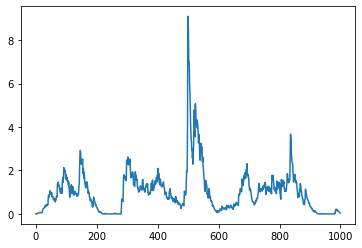

In [365]:
ln =1000
x_sim = sde2([0.4,1.4])
plt.plot(x_sim)


In [366]:
class SummaryNet(nn.Module): 
    
    def __init__(self): 
        super().__init__()
        # 1D convolutional layer (reduces n to n-2)
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        # 1D convolutional layer (reduces n to n-2)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=16, kernel_size=3)
        # Maxpool layer that reduces 198 to 99 and 97 to 48
        self.pool = nn.MaxPool1d(kernel_size=2)
        # Fully connected layer taking as input the 16 output vectors from the maxpooling layer
        self.fc = nn.Linear(in_features=16*np.int(ln/4-2), out_features=4) 
        
    def forward(self, x):
        x = x.view(-1, 1, 1000)
        x = self.pool(F.relu(self.conv1(x)))     # (n-2)/2
        x = self.pool(F.relu(self.conv2(x)))     # (n/4-2)
        x = x.view(-1,16*np.int(ln/4-2))
        x = F.relu(self.fc(x))
        return x

embedding_net = SummaryNet()

i= 6
i= 6


i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0


i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0
i= 0



i= 0
i= 0


i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1


i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1
i= 1



i= 1
i= 1


i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2


i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2
i= 2



i= 2
i= 2


i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3


i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3
i= 3



i= 3
i= 3


i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4


i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4
i= 4


                        prior support. It may take a long time to collect the
                        remaining 9982 samples. Consider interrupting
                        (Ctrl-C) and switching to `sample_with='mcmc'`.



i= 4
i= 4


i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5


i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5
i= 5


                        prior support. It may take a long time to collect the
                        remaining 9991 samples. Consider interrupting
                        (Ctrl-C) and switching to `sample_with='mcmc'`.



i= 5
i= 5


i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6


i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6
i= 6


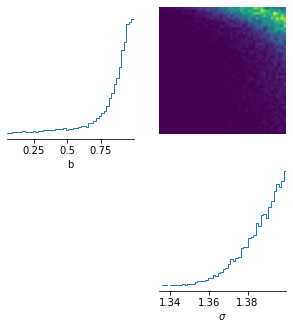

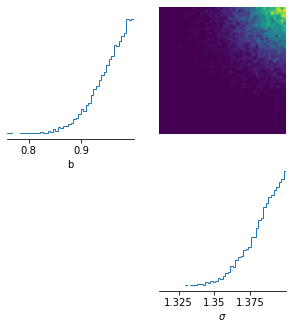

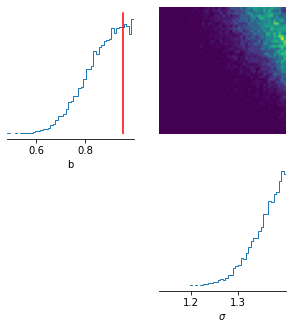

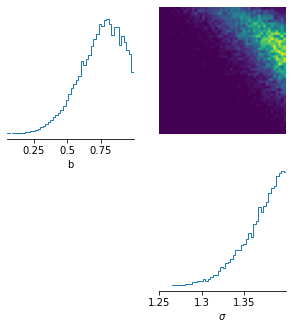

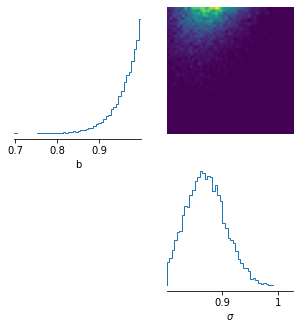

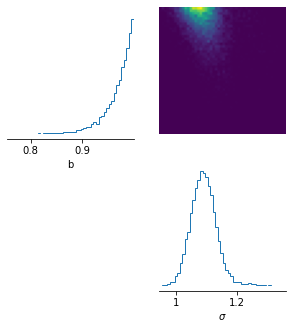

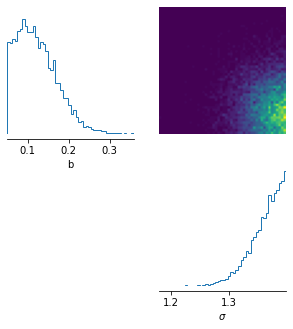

In [406]:
for i in range(7):
    # set prior distribution for the parameters 
    
    prior = utils.BoxUniform(low=torch.tensor([0.05, 0.8]), # A, b
                         high=torch.tensor([1, 1.4]))
    
    #prior = utils.BoxUniform(low=torch.tensor([0.6,0.08]), # b, sd
    #                     high=torch.tensor([1.4,0.5]))

    #prior = utils.BoxUniform(low=torch.tensor([0.4,0.05]),  A, sd
    #                         high=torch.tensor([11.8,1]))



    # make a SBI-wrapper on the simulator object for compatibility
    simulator_wrapper, prior = prepare_for_sbi(sde2, prior)
    
    # instantiate the neural density estimator
    neural_posterior = utils.posterior_nn(model='maf', 
                                      embedding_net=embedding_net,
                                      hidden_features=10,
                                      num_transforms=2)

    # setup the inference procedure with the SNPE-C procedure
    inference = SNPE(prior=prior, density_estimator=neural_posterior)
    
    rn = i
    # run the inference procedure on one round and 10000 simulated data points
    theta, x = simulate_for_sbi(simulator_wrapper, prior, num_simulations=2000)
    
    density_estimator = inference.append_simulations(theta, x).train()
    posterior = inference.build_posterior(density_estimator)
    
    x_observed = discharge_obs[i,:1000]
    posterior_samples = posterior.sample((10000,), x=x_observed)
    np.savetxt('{}{}{}'.format('data/samples_sbi',i,'.txt'),posterior_samples,delimiter=",")
        
    # plot posterior sample
    optimized_parameter = torch.tensor(paroptim_sde[i,[1,6]])
    
    fig, ax = analysis.pairplot(posterior_samples, 
                             points=optimized_parameter,
                             labels=['b', r'$\sigma$'], 
                             #limits=[[4.2,5.8],[0.005,0.025]],
                             points_colors='r',
                             points_offdiag={'markersize': 6},
                             figsize=(5, 5))
    plt.savefig('{}{}{}'.format('images/posterior_sbi',i,'.jpg'),dpi = 150)
    

In [407]:
def sde2_en(theta):
    i = rn 
    maxm =3640
    
    x_out = np.full(maxm + 1, np.nan)  # vector to contain trajectory
    x_out = torch.tensor( x_out)
    x_out[0] = 1.5
    
    #x =  sde([ 3.88029872e-01,  1.46129972e+00,  1.81645402e+00,
    #     1.95657777e-03, -1.93286730e-01,  8.90730747e-01,0.1], (rain_obs[i,]), Temp_obs[i,],runs =1)[:maxm]
    #print(theta)
    #a = theta[0]
    par = paroptim_sde[i,:]
    par[0]=  np.array(theta[0])
    par[1]=  np.array(theta[1])
    x =  sde(par, (rain_obs[i,]), Temp_obs[i,],runs =10)#[:maxm]
       
    return x

In [408]:
# for 2 parameters
#Plot with parametric uncertainty
discharge_par_sam = np.zeros([7,3640, 1000])

for i in range(7):
    rn = i
    samples = np.loadtxt('{}{}{}'.format('data/samples_sbi', i,'.txt'), delimiter=",")
    
    for j in range(100):
        
        discharge_par_sam[i,:,j*10:j*10+10] = sde2_en(samples[j,:])

In [409]:
# Reliability
n=np.zeros(7)

for i in range(7):
    rn = i
    ci5 = np.percentile(discharge_par_sam[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_par_sam[i,:,:], 95, axis=1)
    for j in range(3640):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1

pc = n/3640*100
print(pc)       


# Reliability
ns=np.zeros(7)

for i in range(7):
    rn = i
    mn = np.mean(discharge_par_sam[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:3640]-mn)**2)/np.mean((discharge_obs[i,:3640]-np.mean(discharge_obs[i,:3640]))**2)
    
print(ns)

[54.03846154  1.8956044  41.7032967  12.47252747 39.2032967  82.55494505
 25.65934066]
[-1.30062270e-01 -6.27432386e+02  2.88783067e-01 -4.30113664e-01
  4.13379688e-02 -2.49729901e-02 -1.18070284e+02]


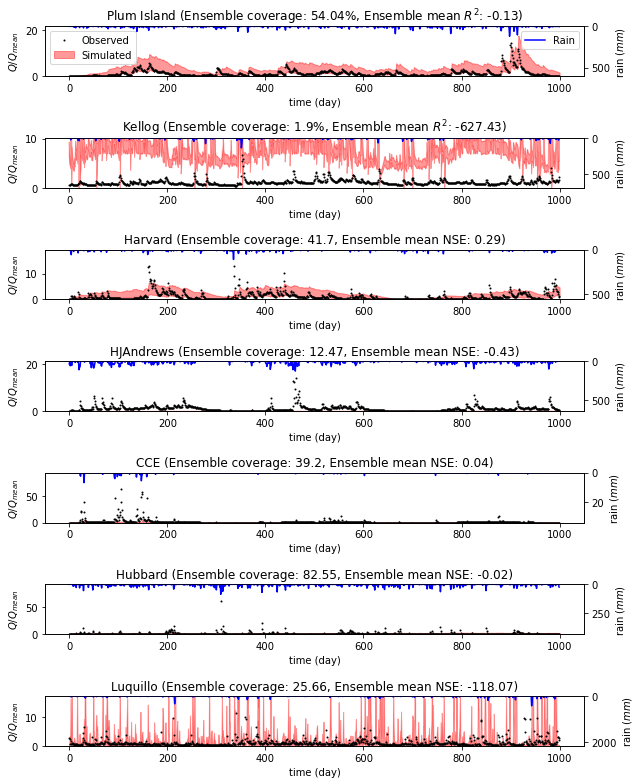

In [410]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(7, figsize=(9,11))
name =['{}{}{}{}{}'.format(r"Plum Island (Ensemble coverage: ", np.around(pc[0], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[0], decimals =2),")"),
       '{}{}{}{}{}'.format(r"Kellog (Ensemble coverage: ", np.around(pc[1], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[1], decimals =2),")"),
       '{}{}{}{}{}'.format("Harvard (Ensemble coverage: ", np.around(pc[2], decimals =2),", Ensemble mean NSE: ", np.around(ns[2], decimals =2),")"),
       '{}{}{}{}{}'.format("HJAndrews (Ensemble coverage: ", np.around(pc[3], decimals =2),", Ensemble mean NSE: ", np.around(ns[3], decimals =2),")"),
       '{}{}{}{}{}'.format("CCE (Ensemble coverage: ", np.around(pc[4], decimals =2),", Ensemble mean NSE: ", np.around(ns[4], decimals =2),")"),
       '{}{}{}{}{}'.format("Hubbard (Ensemble coverage: ", np.around(pc[5], decimals =2),", Ensemble mean NSE: ", np.around(ns[5], decimals =2),")"),
       '{}{}{}{}{}'.format("Luquillo (Ensemble coverage: ", np.around(pc[6], decimals =2),", Ensemble mean NSE: ", np.around(ns[6], decimals =2),")")]

init = 1000
end  = 2000
for i in range(7):
    rn= i
    
    ax_right = ax_left[i].twinx()
    
    #ax_left[i].plot(discharge_sim_en[i,init:end,10:13],color='red',linewidth=1)
    ax_left[i].plot(discharge_obs[i,init:end], '.',color='black',markersize =2)

    ax_left[i].fill_between(np.linspace(0, end-init, end-init),np.percentile(discharge_par_sam[i,init:end,:], 5, axis=1), np.percentile(discharge_par_sam[i,init:end,:], 95, axis=1), color='red', alpha=0.4)
    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,init:end], color='blue')
    #ax_right.fill_between(range(len(rain_obs[i,init:])), min(rain_obs[i,init:]), 3000, where=(rain_obs[i,init:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,init:end])])
    ax_right.set_ylim([5*max(rain_obs[i,init:end]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()
    
    #plt.axvline(x=2000, color = 'black',label = "Calibration to validation")
    
plt.savefig('images/hydrograph_parsam.jpg',dpi = 150)

# Plot for mean of posterior parameters

In [411]:
def sde2_en(theta):
    i = rn 
    #maxm =3640

    par = paroptim_sde[i,:]
    par[0]=  np.array(theta[0])
    par[1]=  np.array(theta[1])
    x =  sde(par, (rain_obs[i,]), Temp_obs[i,],runs =1000)#[:maxm]
       
    return x

In [412]:
# for 2 parameters
#Plot without parametric uncertainty
discharge_parpost = np.zeros([7,3640, 1000])

for i in range(7):
    rn = i
    samples = np.loadtxt('{}{}{}'.format('data/samples_sbi', i,'.txt'), delimiter=",")
    samples_opt = np.average(samples, axis=0)
    #samples_opt = paroptim_sde[i,(1,6)]
    discharge_parpost[i,:,:] = sde2_en(samples_opt)
    #discharge_paroptim[i,:,:] =sde(paroptim_sde[i,:], (rain_obs[i,:]), Temp_obs[i,:],runs =1000)

In [413]:
# Reliability
n=np.zeros(7)

for i in range(7):
    rn = i
    ci5 = np.percentile(discharge_parpost[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_parpost[i,:,:], 95, axis=1)
    for j in range(3640):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1

pc = n/3640*100
print(pc)       


# Reliability
ns=np.zeros(7)

for i in range(7):
    rn = i
    mn = np.mean(discharge_parpost[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:3640]-mn)**2)/np.mean((discharge_obs[i,:3640]-np.mean(discharge_obs[i,:3640]))**2)
    
print(ns)

[34.97252747  0.65934066 37.71978022 10.98901099 38.92857143 80.68681319
 10.54945055]
[-1.46556676e-01 -6.27486999e+02  2.80042565e-01 -4.18820434e-01
  4.14953420e-02 -4.64565017e-02 -9.03989039e+01]


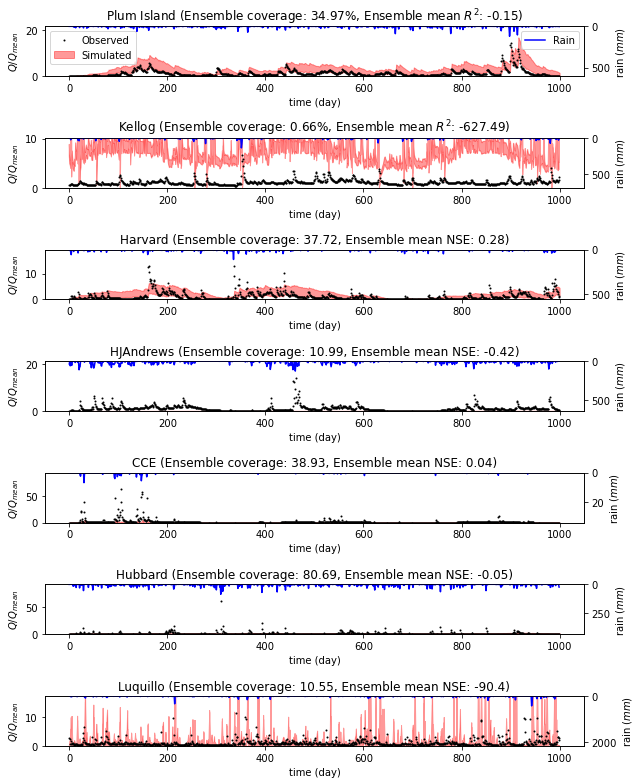

In [414]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(7, figsize=(9,11))
name =['{}{}{}{}{}'.format(r"Plum Island (Ensemble coverage: ", np.around(pc[0], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[0], decimals =2),")"),
       '{}{}{}{}{}'.format(r"Kellog (Ensemble coverage: ", np.around(pc[1], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[1], decimals =2),")"),
       '{}{}{}{}{}'.format("Harvard (Ensemble coverage: ", np.around(pc[2], decimals =2),", Ensemble mean NSE: ", np.around(ns[2], decimals =2),")"),
       '{}{}{}{}{}'.format("HJAndrews (Ensemble coverage: ", np.around(pc[3], decimals =2),", Ensemble mean NSE: ", np.around(ns[3], decimals =2),")"),
       '{}{}{}{}{}'.format("CCE (Ensemble coverage: ", np.around(pc[4], decimals =2),", Ensemble mean NSE: ", np.around(ns[4], decimals =2),")"),
       '{}{}{}{}{}'.format("Hubbard (Ensemble coverage: ", np.around(pc[5], decimals =2),", Ensemble mean NSE: ", np.around(ns[5], decimals =2),")"),
       '{}{}{}{}{}'.format("Luquillo (Ensemble coverage: ", np.around(pc[6], decimals =2),", Ensemble mean NSE: ", np.around(ns[6], decimals =2),")")]

init = 1000
end  = 2000
for i in range(7):
    rn = i
    ax_right = ax_left[i].twinx()
    
    #ax_left[i].plot(discharge_sim_en[i,init:end,10:13],color='red',linewidth=1)
    ax_left[i].plot(discharge_obs[i,init:end], '.',color='black',markersize =2)

    ax_left[i].fill_between(np.linspace(0, end-init, end-init),np.percentile(discharge_parpost[i,init:end,:], 5, axis=1), np.percentile(discharge_parpost[i,init:end,:], 95, axis=1), color='red', alpha=0.4)
    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,init:end], color='blue')
    #ax_right.fill_between(range(len(rain_obs[i,init:])), min(rain_obs[i,init:]), 3000, where=(rain_obs[i,init:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,init:end])])
    ax_right.set_ylim([5*max(rain_obs[i,init:end]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()
    
    #plt.axvline(x=2000, color = 'black',label = "Calibration to validation")
    
plt.savefig('images/hydrograph_parmaxpost.jpg',dpi = 150)

# Plot for mean of posterior parameters

In [398]:
def sde2_en(theta):
    i = rn 
    #maxm =3640

    par = paroptim_sde[i,:]
    #par[0]=  np.array(theta[0])
    #par[1]=  np.array(theta[1])
    x =  sde(par, (rain_obs[i,]), Temp_obs[i,],runs =1000)#[:maxm]
       
    return x

In [399]:
# for 2 parameters
#Plot without parametric uncertainty
discharge_paroptim = np.zeros([7,3640, 1000])

for i in range(7):
    rn = i
    samples = np.loadtxt('{}{}{}'.format('data/samples_sbi', i,'.txt'), delimiter=",")
    #samples_opt = np.average(samples, axis=0)
    samples_opt = paroptim_sde[i,(0,1)]
    discharge_paroptim[i,:,:] = sde2_en(samples_opt)
    #discharge_paroptim[i,:,:] =sde(paroptim_sde[i,:], (rain_obs[i,:]), Temp_obs[i,:],runs =1000)

In [400]:
# Reliability
n=np.zeros(7)

for i in range(7):
    rn = i
    ci5 = np.percentile(discharge_paroptim[i,:,:], 5, axis=1)
    ci95 = np.percentile(discharge_paroptim[i,:,:], 95, axis=1)
    for j in range(3640):
        if  ci5[j] < discharge_obs[i,j] and ci95[j] > discharge_obs[i,j]:
            n[i] = n[i]+1

pc = n/3640*100
print(pc)       


# Reliability
ns=np.zeros(7)

for i in range(7):
    rn = i
    mn = np.mean(discharge_paroptim[i,:,:],axis=1)
    ns[i]=1-np.mean((discharge_obs[i,:3640]-mn)**2)/np.mean((discharge_obs[i,:3640]-np.mean(discharge_obs[i,:3640]))**2)
    
print(ns)

[56.48351648 47.03296703 33.35164835 64.03846154 39.01098901 54.3956044
 50.68681319]
[ 0.72919204  0.54105326  0.46815009  0.56796606  0.40015653  0.08528385
 -0.253888  ]


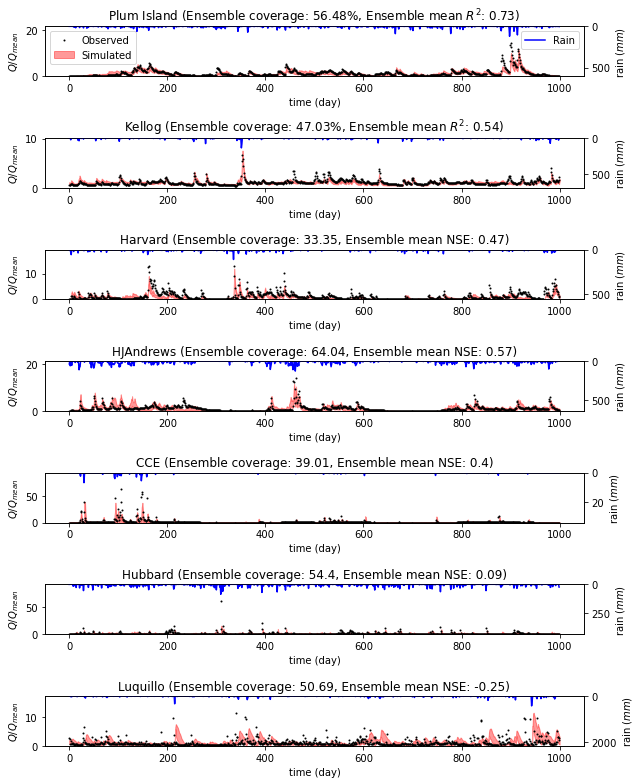

In [401]:
# Plot without parametric uncertainty
fig, ax_left = plt.subplots(7, figsize=(9,11))
name =['{}{}{}{}{}'.format(r"Plum Island (Ensemble coverage: ", np.around(pc[0], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[0], decimals =2),")"),
       '{}{}{}{}{}'.format(r"Kellog (Ensemble coverage: ", np.around(pc[1], decimals =2),"%, Ensemble mean $R^2$: ", np.around(ns[1], decimals =2),")"),
       '{}{}{}{}{}'.format("Harvard (Ensemble coverage: ", np.around(pc[2], decimals =2),", Ensemble mean NSE: ", np.around(ns[2], decimals =2),")"),
       '{}{}{}{}{}'.format("HJAndrews (Ensemble coverage: ", np.around(pc[3], decimals =2),", Ensemble mean NSE: ", np.around(ns[3], decimals =2),")"),
       '{}{}{}{}{}'.format("CCE (Ensemble coverage: ", np.around(pc[4], decimals =2),", Ensemble mean NSE: ", np.around(ns[4], decimals =2),")"),
       '{}{}{}{}{}'.format("Hubbard (Ensemble coverage: ", np.around(pc[5], decimals =2),", Ensemble mean NSE: ", np.around(ns[5], decimals =2),")"),
       '{}{}{}{}{}'.format("Luquillo (Ensemble coverage: ", np.around(pc[6], decimals =2),", Ensemble mean NSE: ", np.around(ns[6], decimals =2),")")]

init = 1000
end  = 2000
for i in range(7):
    rn = i
    ax_right = ax_left[i].twinx()
    
    #ax_left[i].plot(discharge_sim_en[i,init:end,10:13],color='red',linewidth=1)
    ax_left[i].plot(discharge_obs[i,init:end], '.',color='black',markersize =2)

    ax_left[i].fill_between(np.linspace(0, end-init, end-init),np.percentile(discharge_paroptim[i,init:end,:], 5, axis=1), np.percentile(discharge_paroptim[i,init:end,:], 95, axis=1), color='red', alpha=0.4)
    ax_right.invert_yaxis()
    ax_right.plot(rain_obs[i,init:end], color='blue')
    #ax_right.fill_between(range(len(rain_obs[i,init:])), min(rain_obs[i,init:]), 3000, where=(rain_obs[i,init:]==0) & (rain_obs[i,:] > -0.1), alpha=0.2, color ="gray")
    ax_left[i].set_ylim([0, 1.5*max(discharge_obs[i,init:end])])
    ax_right.set_ylim([5*max(rain_obs[i,init:end]),0])
    ax_left[i].set_xlabel('time (day)')
    ax_left[i].set_ylabel(r'$Q/Q_{mean}$')
    ax_right.set_ylabel(r'rain $(mm)$')#,rotation=-90)
    
    if i == 0:
            ax_right.legend(['Rain'], loc = 'upper right')
            ax_left[i].legend(['Observed','Simulated'], loc = 'upper left' )
    
    ax_left[i].set_title(name[i])
    plt.tight_layout()
    
    #plt.axvline(x=2000, color = 'black',label = "Calibration to validation")
    
plt.savefig('images/hydrograph_parmaxpost.jpg',dpi = 150)